In [56]:
from platform import python_version
print(python_version())

3.6.12


In [61]:
from zipline import run_algorithm
from zipline.api import order_target_percent, symbol
from datetime import datetime
import matplotlib.pyplot as plt
import pytz
import pandas as pd

# silence warnings
import warnings
warnings.filterwarnings('ignore')

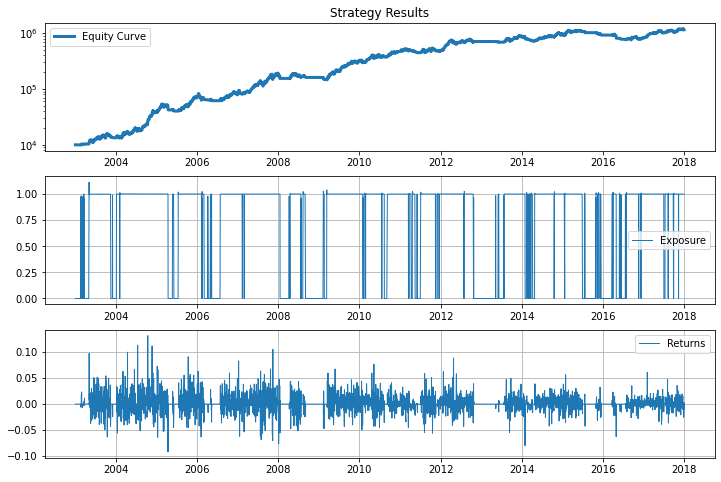

In [62]:
def initialize(context):
    context.stock = symbol("AAPL")
    context.index_average_window = 100
    
def handle_data(context, data):  
    equities_hist = data.history(context.stock,
                                "close",
                                context.index_average_window,
                                "1d")
    
    # Check price is above moving average
    if equities_hist[-1] > equities_hist.mean():
        stock_weight = 1
    else:
        stock_weight = 0
        
    order_target_percent(context.stock, stock_weight)
    
def analyze(context, plot):
    fig = plt.figure(figsize = (12, 8))
    
    # First chart
    ax = fig.add_subplot(311)
    ax.set_title("Strategy Results")
    ax.semilogy(plot["portfolio_value"],
                linestyle = "-",
                label = "Equity Curve",
                linewidth = 3)
    ax.legend()
    ax.grid(False)
    
    # Second chart
    ax = fig.add_subplot(312)
    ax.plot(plot["gross_leverage"],
            label = "Exposure",
            linestyle = "-",
            linewidth = 1)
    ax.legend()
    ax.grid(True)
    
    # Third chart
    ax = fig.add_subplot(313)
    ax.plot(plot["returns"],
            label = "Returns",
            linestyle = "-",
            linewidth = 1)
    ax.legend()
    ax.grid(True)
    
# Fire off the backtest
start_date = pd.Timestamp('2003-1-1', tz='utc')
end_date = pd.Timestamp('2018-1-1', tz='utc')

results = run_algorithm(start = start_date,
                        end = end_date,
                        initialize = initialize,
                        handle_data = handle_data,
                        analyze = analyze,
                        capital_base = 10000,
                        data_frequency = 'daily')